In [1]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 78% 128M/163M [00:00<00:00, 1.34GB/s]
100% 163M/163M [00:00<00:00, 1.23GB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencied

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3331.jpg', 'with_mask_3467.jpg', 'with_mask_729.jpg', 'with_mask_2834.jpg', 'with_mask_670.jpg']
['with_mask_3211.jpg', 'with_mask_3103.jpg', 'with_mask_256.jpg', 'with_mask_3124.jpg', 'with_mask_1588.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_3504.jpg', 'without_mask_3361.jpg', 'without_mask_1061.jpg', 'without_mask_235.jpg', 'without_mask_2311.jpg']
['without_mask_2860.jpg', 'without_mask_1068.jpg', 'without_mask_754.jpg', 'without_mask_1111.jpg', 'without_mask_3091.jpg']


In [9]:
print("Number of With Mask iamges : ",len(with_mask_files))
print("Number of Without Mask images : ",len(without_mask_files))

Number of With Mask iamges :  3725
Number of Without Mask images :  3828


Creating Labels for the Two Class of Images

with mask --> 1

without mask --> 0

In [10]:
#creating the labels

with_mask_labels = [1]*len(with_mask_files)

without_mask_labels = [0]*len(without_mask_files)

In [11]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


Displaying the Images

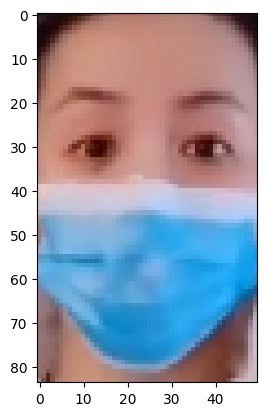

In [14]:
#displaying with mask images
img = mpimg.imread('/content/data/with_mask/with_mask_15.jpg')
imgplot = plt.imshow(img)
plt.show()

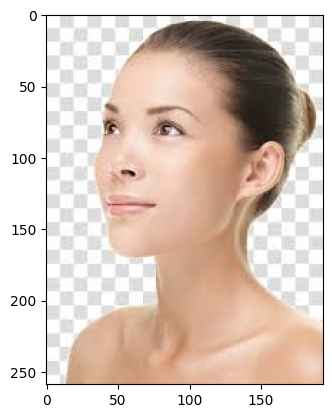

In [15]:
#displaying without mask images
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

Image Processing

1. Resizing the Images
2. Converting the Images into Numpy Arrays

In [17]:
#converting the images into numpy arrays

with_mask_path = '/content/data/with_mask'

data = []

for img_files in with_mask_files:
  image = Image.open(with_mask_path + '/' + img_files)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask'

for img_files in without_mask_files:
  image = Image.open(without_mask_path + '/' + img_files)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [18]:
type(data)

list

In [19]:
len(data)

7553

array([[[252, 231, 204],
        [254, 237, 213],
        [255, 246, 228],
        ...,
        [184, 156, 129],
        [183, 158, 132],
        [184, 164, 141]],

       [[252, 232, 205],
        [254, 239, 214],
        [255, 247, 228],
        ...,
        [186, 158, 131],
        [191, 170, 148],
        [225, 214, 199]],

       [[251, 233, 205],
        [254, 241, 215],
        [254, 248, 229],
        ...,
        [201, 185, 165],
        [241, 235, 227],
        [255, 254, 250]],

       ...,

       [[206, 189, 171],
        [201, 184, 168],
        [187, 169, 155],
        ...,
        [188, 178, 169],
        [176, 163, 150],
        [175, 159, 143]],

       [[207, 190, 172],
        [204, 187, 171],
        [195, 177, 162],
        ...,
        [179, 165, 156],
        [165, 152, 140],
        [177, 161, 147]],

       [[207, 190, 172],
        [206, 189, 173],
        [199, 181, 167],
        ...,
        [180, 161, 145],
        [181, 164, 148],
        [182, 164, 149]]], dtype=uint8)
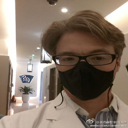

In [20]:
data[0]

In [21]:
type(data[0])

numpy.ndarray

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
#converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [24]:
type(X)

numpy.ndarray

In [25]:
type(Y)

numpy.ndarray

In [26]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [27]:
print(Y)

[1 1 1 ... 0 0 0]


Train Test Split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [39]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [40]:
#scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[209, 209, 209],
        [209, 209, 209],
        [209, 209, 209],
        ...,
        [217, 217, 217],
        [217, 217, 217],
        [217, 217, 217]],

       [[209, 209, 209],
        [209, 209, 209],
        [209, 209, 209],
        ...,
        [217, 217, 217],
        [217, 217, 217],
        [217, 217, 217]],

       [[209, 209, 209],
        [209, 209, 209],
        [209, 209, 209],
        ...,
        [218, 218, 218],
        [218, 218, 218],
        [218, 218, 218]],

       ...,

       [[ 39,  45,  61],
        [ 38,  43,  59],
        [ 38,  41,  56],
        ...,
        [ 48,  62,  92],
        [ 55,  68, 100],
        [ 65,  80, 111]],

       [[ 42,  49,  66],
        [ 42,  47,  63],
        [ 40,  45,  61],
        ...,
        [ 45,  59,  88],
        [ 56,  69, 101],
        [ 68,  83, 114]],

       [[ 42,  49,  67],
        [ 41,  48,  65],
        [ 40,  46,  63],
        ...,
        [ 44,  57,  87],
        [ 57,  70, 102],
        [ 68,  83, 114]]], dtype=uint8)
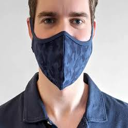

In [41]:
X_train[0]

In [42]:
X_train_scaled[0]

array([[[0.81960784, 0.81960784, 0.81960784],
        [0.81960784, 0.81960784, 0.81960784],
        [0.81960784, 0.81960784, 0.81960784],
        ...,
        [0.85098039, 0.85098039, 0.85098039],
        [0.85098039, 0.85098039, 0.85098039],
        [0.85098039, 0.85098039, 0.85098039]],

       [[0.81960784, 0.81960784, 0.81960784],
        [0.81960784, 0.81960784, 0.81960784],
        [0.81960784, 0.81960784, 0.81960784],
        ...,
        [0.85098039, 0.85098039, 0.85098039],
        [0.85098039, 0.85098039, 0.85098039],
        [0.85098039, 0.85098039, 0.85098039]],

       [[0.81960784, 0.81960784, 0.81960784],
        [0.81960784, 0.81960784, 0.81960784],
        [0.81960784, 0.81960784, 0.81960784],
        ...,
        [0.85490196, 0.85490196, 0.85490196],
        [0.85490196, 0.85490196, 0.85490196],
        [0.85490196, 0.85490196, 0.85490196]],

       ...,

       [[0.15294118, 0.17647059, 0.23921569],
        [0.14901961, 0.16862745, 0.23137255],
        [0.14901961, 0

Building a Convolutional Neural Network

In [43]:
import tensorflow as tf
from tensorflow import keras

In [44]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
#compiliong the neural network

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [46]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1 ,epochs = 5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 16s 44ms/step - acc: 0.7132 - loss: 0.6138 - val_acc: 0.9240 - val_loss: 0.2588
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.8891 - loss: 0.2858 - val_acc: 0.9174 - val_loss: 0.2194
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9066 - loss: 0.2408 - val_acc: 0.9405 - val_loss: 0.2204
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9225 - loss: 0.1978 - val_acc: 0.9306 - val_loss: 0.2052
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9314 - loss: 0.1704 - val_acc: 0.9355 - val_loss: 0.1967


Model Evaluation

In [48]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print("Test Accuracy : ",accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 0.9204 - loss: 0.1979
Test Accuracy :  0.921244204044342


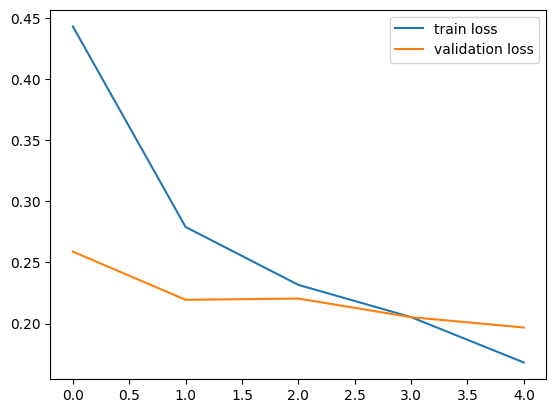

In [49]:
h = history

#plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

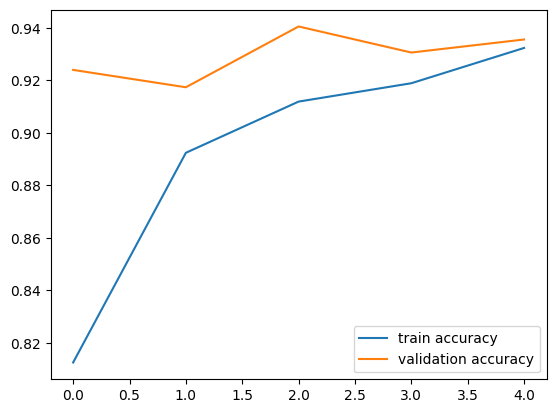

In [51]:
#plot the loss value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Predictive System

In [ ]:
input_path_image = input("Path of the Image to be Predicted")

input_image = cv2.imread(input_path_image)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resize/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print("The person in the image is wearing a mask")
else:
  print("The person in the image is not wearing a mask")